In [1]:
import sys
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from schechter           import schechters, mxxl_schechter, schechter, mxxl_kernel, mxxl_phistar
from scipy.interpolate   import interp1d
from scipy.misc          import derivative
from scipy.optimize      import brentq
from mxxl_ecorr          import mxxl_ecorr

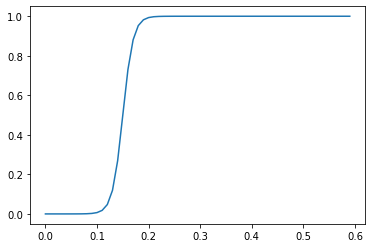

In [4]:
zs = np.arange(0.0, 0.6, 0.01)

pl.plot(zs, mxxl_kernel(zs))

In [5]:
limit  = -10.

zs     = np.arange(0.0, 1.,  1.e-2)
Ms     = np.arange(-23., limit, 0.01)

window = (Ms > -16.) & (Ms < (limit - 0.1))

Text(0, 0.5, '$M_{\\rm star}$')

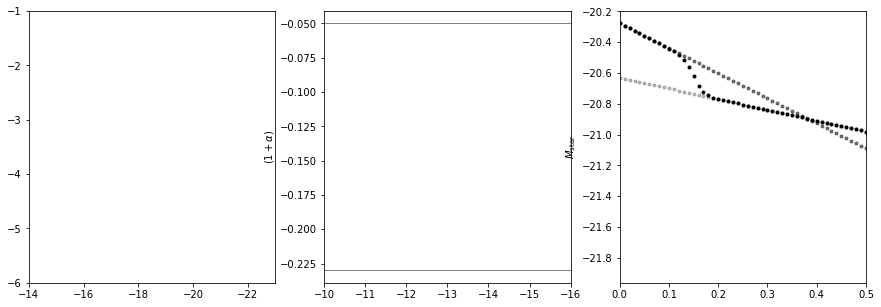

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors     = prop_cycle.by_key()['color']
colors     = colors * 100

axes[1].axhline((1 + -1.05), c='k', lw=0.5)
axes[1].axhline((1 + -1.23), c='k', lw=0.5)

result = []

for zz, color in zip(zs, colors):
    sch = mxxl_schechter(Ms, zz)
    # sch = schechter(Ms, named_type='Blanton', zz=None)
    
    # axes[0].plot(Ms, np.log10(sch), label='z={:.3f}'.format(zz), lw=0.5, c=color)
    
    sch = interp1d(Ms, sch, kind='linear')
    
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
    frac_drv = np.array([derivative(sch, x, dx=0.01, n=1, order=3) / sch(x) / (-0.4) / np.log(10.) for x in Ms[window]])
    
    # (1. + alpha)
    # axes[1].plot(Ms[window], frac_drv, label='z={:.3f}'.format(zz), lw=0.5, c=color)
    
    diff      = lambda MM:  np.exp(-1.) - (sch(MM) / np.log(10.) / 0.4 / mxxl_phistar(zz))
    eff_Mstar = brentq(diff, -15., -23.)
    
    axes[2].plot(zz, eff_Mstar, marker='.', c='k')
    
    axes[2].plot(zz, -20.44 - 1.62 * (zz - 0.1), c='k', alpha=0.50, marker='.')
    axes[2].plot(zz, -20.70 - 0.70 * (zz - 0.1), c='k', alpha=0.25, marker='.')

    result.append([zz, eff_Mstar])
    
result = np.array(result)
    
axes[0].set_xlim(-14., -23.)
axes[0].set_ylim(-6.,  -1.0)

# axes[0].legend(frameon=False, ncol=2, loc=3)

axes[1].set_xlim(limit, -16.)
axes[1].set_ylabel(r'$(1 + \alpha)$')

axes[2].set_xlim(0.0, 0.5)
axes[2].set_ylabel(r'$M_{\rm star}$')

Text(0, 0.5, 'MXXL eff. M_*')

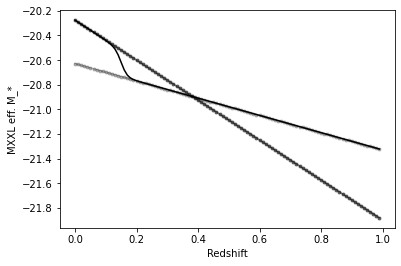

In [7]:
zz = result[:,0]

pl.plot(zz, -20.44 - 1.62 * (zz - 0.1), c='k', alpha=0.50, marker='.')
pl.plot(zz, -20.70 - 0.70 * (zz - 0.1), c='k', alpha=0.25, marker='.')

pl.plot(zz, result[:,1], c='k')

pl.xlabel('Redshift')
pl.ylabel('MXXL eff. M_*')

In [8]:
result[:,1] = result[:,1] - (-20.44)

Text(0, 0.5, 'MXXL e-correction')

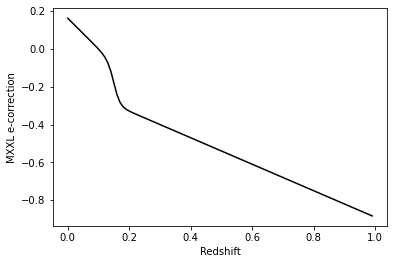

In [9]:
pl.plot(result[:,0], result[:,1], c='k')

pl.xlabel('Redshift')
pl.ylabel('MXXL e-correction')

In [10]:
np.savetxt('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/data/mxxl_ecorr.txt', result, fmt='%.6e')

Text(0, 0.5, 'MXXL e-correction')

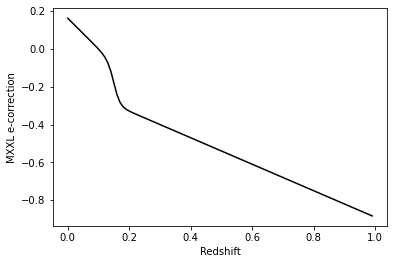

In [11]:
zs = np.arange(0.0, 1.0, 0.01)
es = mxxl_ecorr(zs)

pl.plot(zs, es, c='k')

pl.xlabel('Redshift')
pl.ylabel('MXXL e-correction')

# Done.